In [1]:
# https://github.com/behavioral-ds/evently
library(evently)
library(repr)
options(repr.plot.width=14, repr.plot.height=7, repr.plot.res = 200)

set.seed(10)

## Analiza zbioru

1. Zbiór maili wewnątrz przedsiębiorstwa średniego rozmiaru. Dane zawierają nadawcę (ID), odbiorcę (ID) oraz datę wysłania maila. Ponadto w danych znajduje się lista relacji pracowników (przełożony - podwładny).

2. Dane przedstawiają listę maili przesyłanych w terminie 2010-01-01 do 2010-09-30 wewnątrz firmy. Każdy wysłany mail stanowi zatem jedno wydarzenie, umiejscowione na osi czasu. Część maili została jednak wysłana w tym samym czasie (ten sam nadawca, wysłanie zbiorowe) - rozwiązaniem, które zastosowałem jest połączenie tych maili w jedno wydarzenie, a liczba maili z tego momentu stanowi wartość atrybutu `magnitude`.

3. Dane podzieliłem względem zespołów, tzn. każdy mail zawierający pracownika danego zespołu (podlegającego pod tę samą osobę co pozostali członkowie zespołu) jako nadawcę lub odbiorcę trafia do puli maili w zespole. Takie podejście nie zamyka całkowicie zbioru maili na komunikację wewnątrzzespołową (ktoś z zewnątrz też może pisać), natomiast ogranicza ogólny kontekst wiadomości, zwiększając tym samym zależności między nimi.

Podsumowując, zbiór po przetworzeniu (`pre_processing.py`) stanowi sekwencję wydarzeń na osi czasu, ograniczoną względem zadanego kontekstu (zespół), co moim zdaniem stanowi sensowny zbiór do modelowania procesem Hawkesa.

In [2]:
data_141 <- read.csv("data/141.csv", sep=";")
data_29 <- read.csv("data/29.csv", sep=";")
limited_data_141 <- data_141[1: 200,]
limited_data_29 <- data_29[1: 200,]
head(limited_data_141, 10)

,magnitude,time
,<int>,<dbl>
1,4,0.0000000
2,6,0.5747793
3,1,0.5771503
4,1,0.5773083
5,1,0.5774493
6,1,0.5775860
7,1,0.5777484
8,1,0.5778423
9,1,0.5780303


## Zespół 141

In [3]:
fitted_model_141 <- fit_series(limited_data_141, model_type = 'mEXP', cores = 8, observation_time = max(limited_data_141$time))
fitted_model_141

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 5.07e+00; beta 2.25e-01; theta 1.29e+00
- par:
  K 9.49e-01; beta 5.18e-02; theta 4.35e+01
- Neg Log Likelihood: -878.455 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 

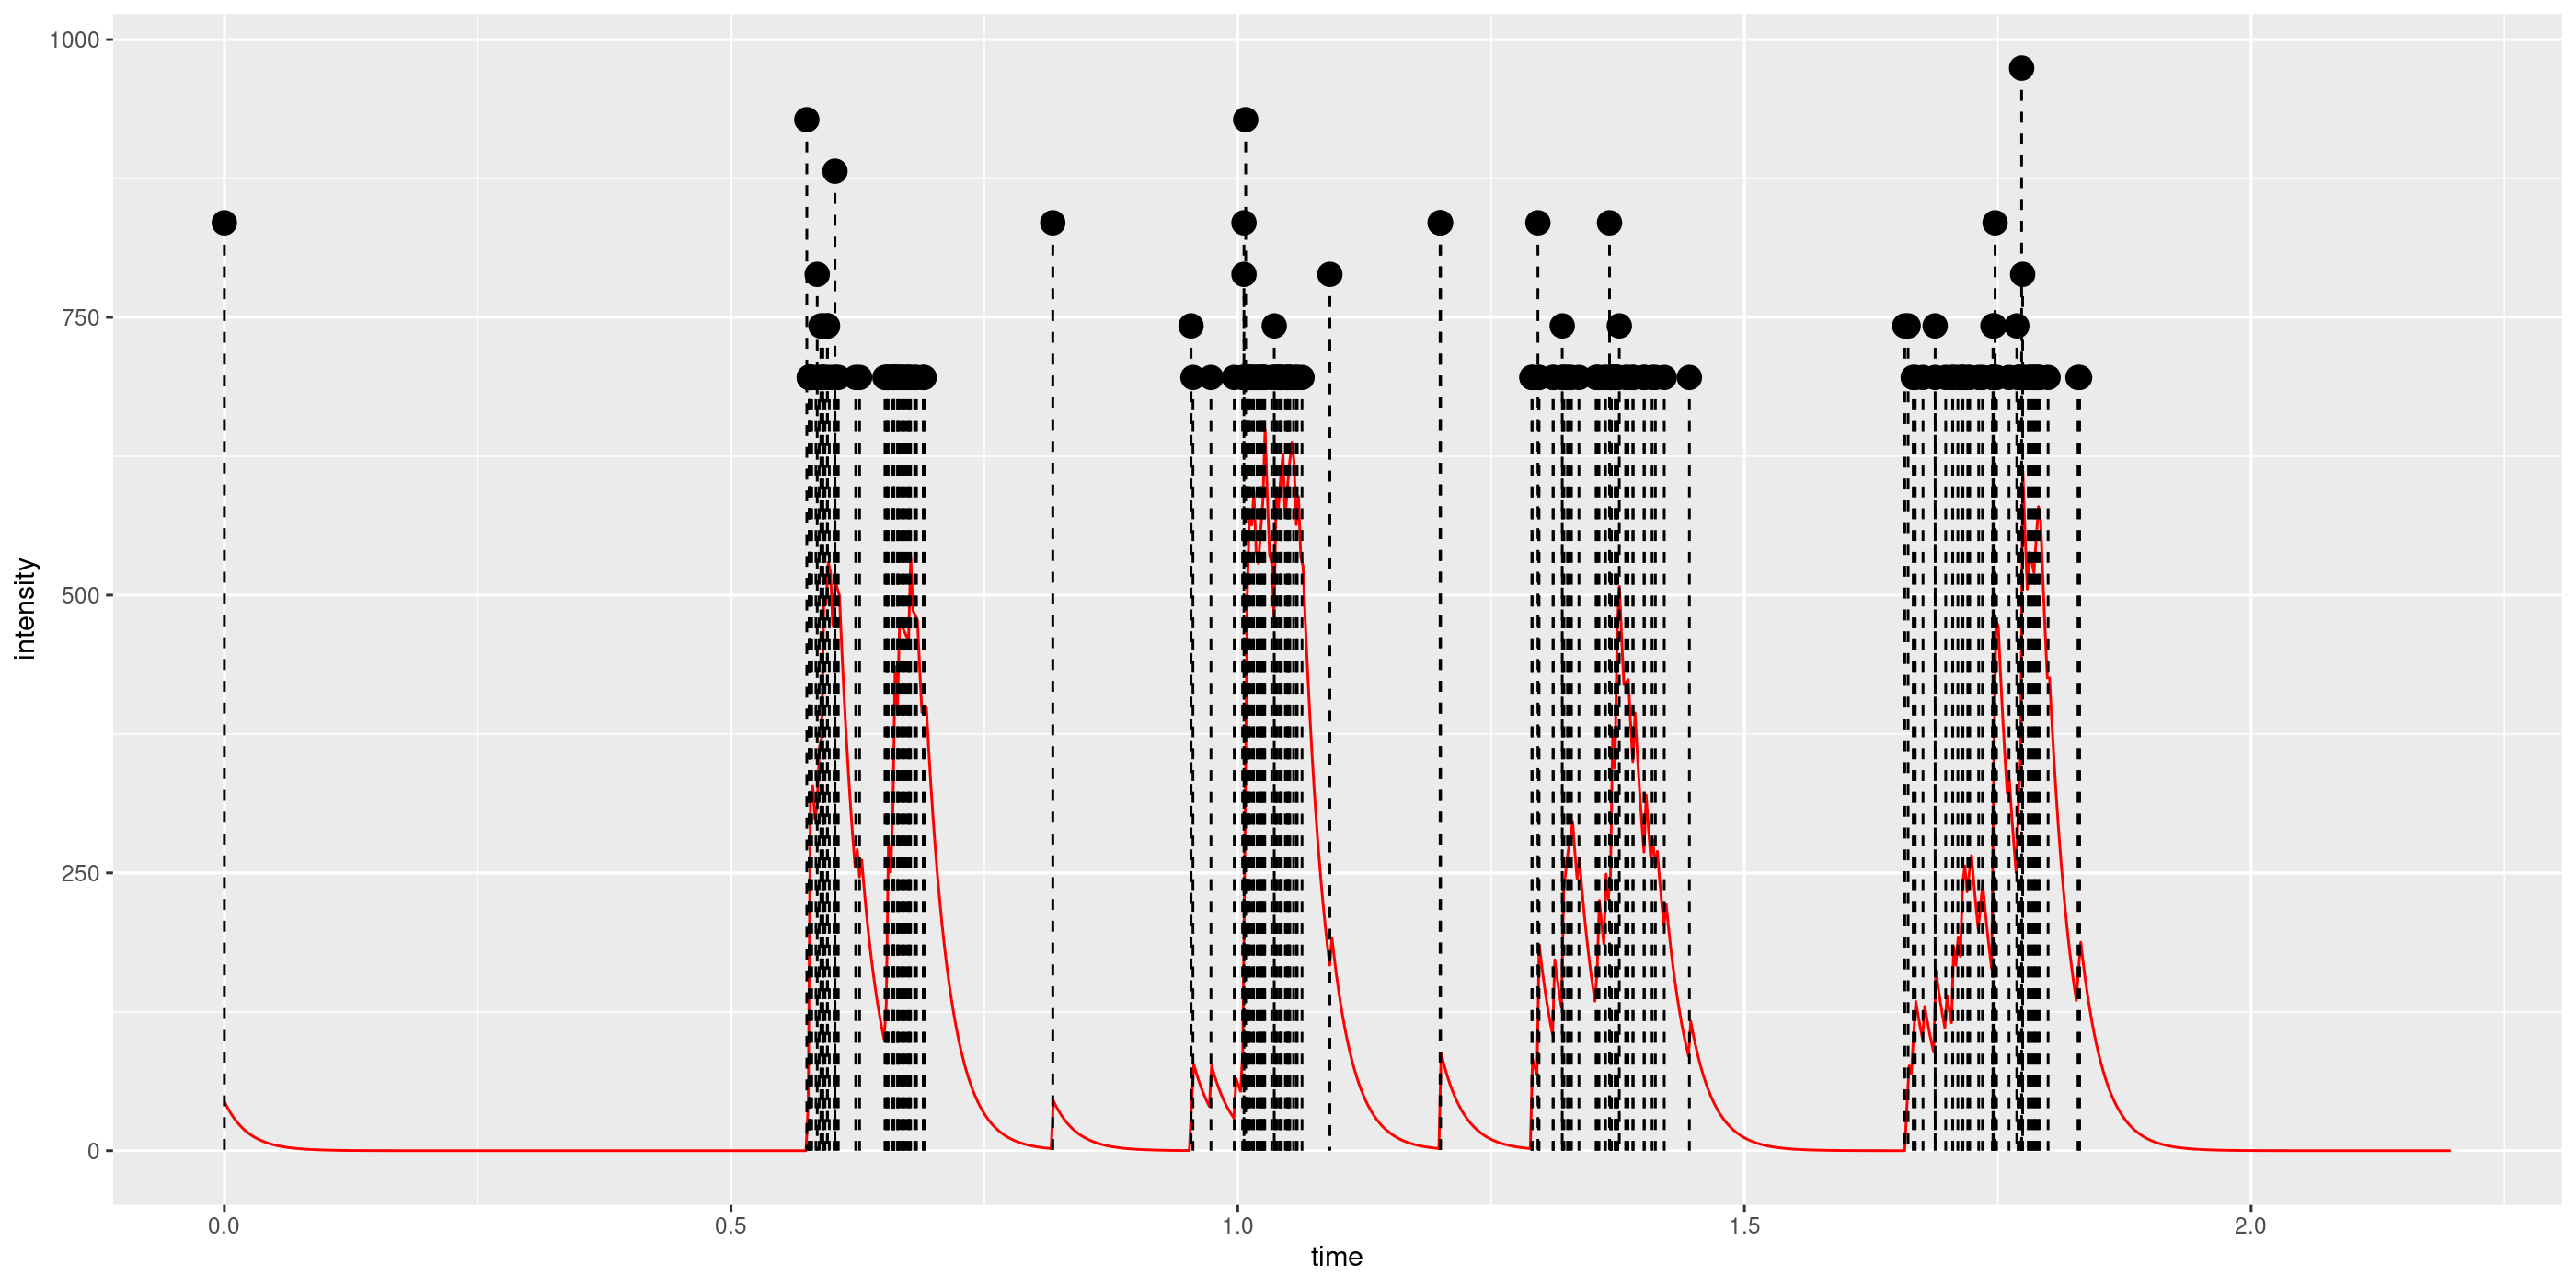

In [4]:
plot_event_series(fitted_model_141)

In [5]:
get_branching_factor(fitted_model_141)

[1] 0.9999999

In [6]:
predict_final_popularity(fitted_model_141)

[1] 33065571

## Zespół 29

In [7]:
fitted_model_29 <- fit_series(limited_data_29, model_type = 'mEXP', cores = 8, observation_time=max(limited_data_29$time))
fitted_model_29

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 7.07e+00; beta 5.36e-01; theta 8.26e-01
- par:
  K 9.44e-01; beta 5.71e-02; theta 1.40e+01
- Neg Log Likelihood: -526.653 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 

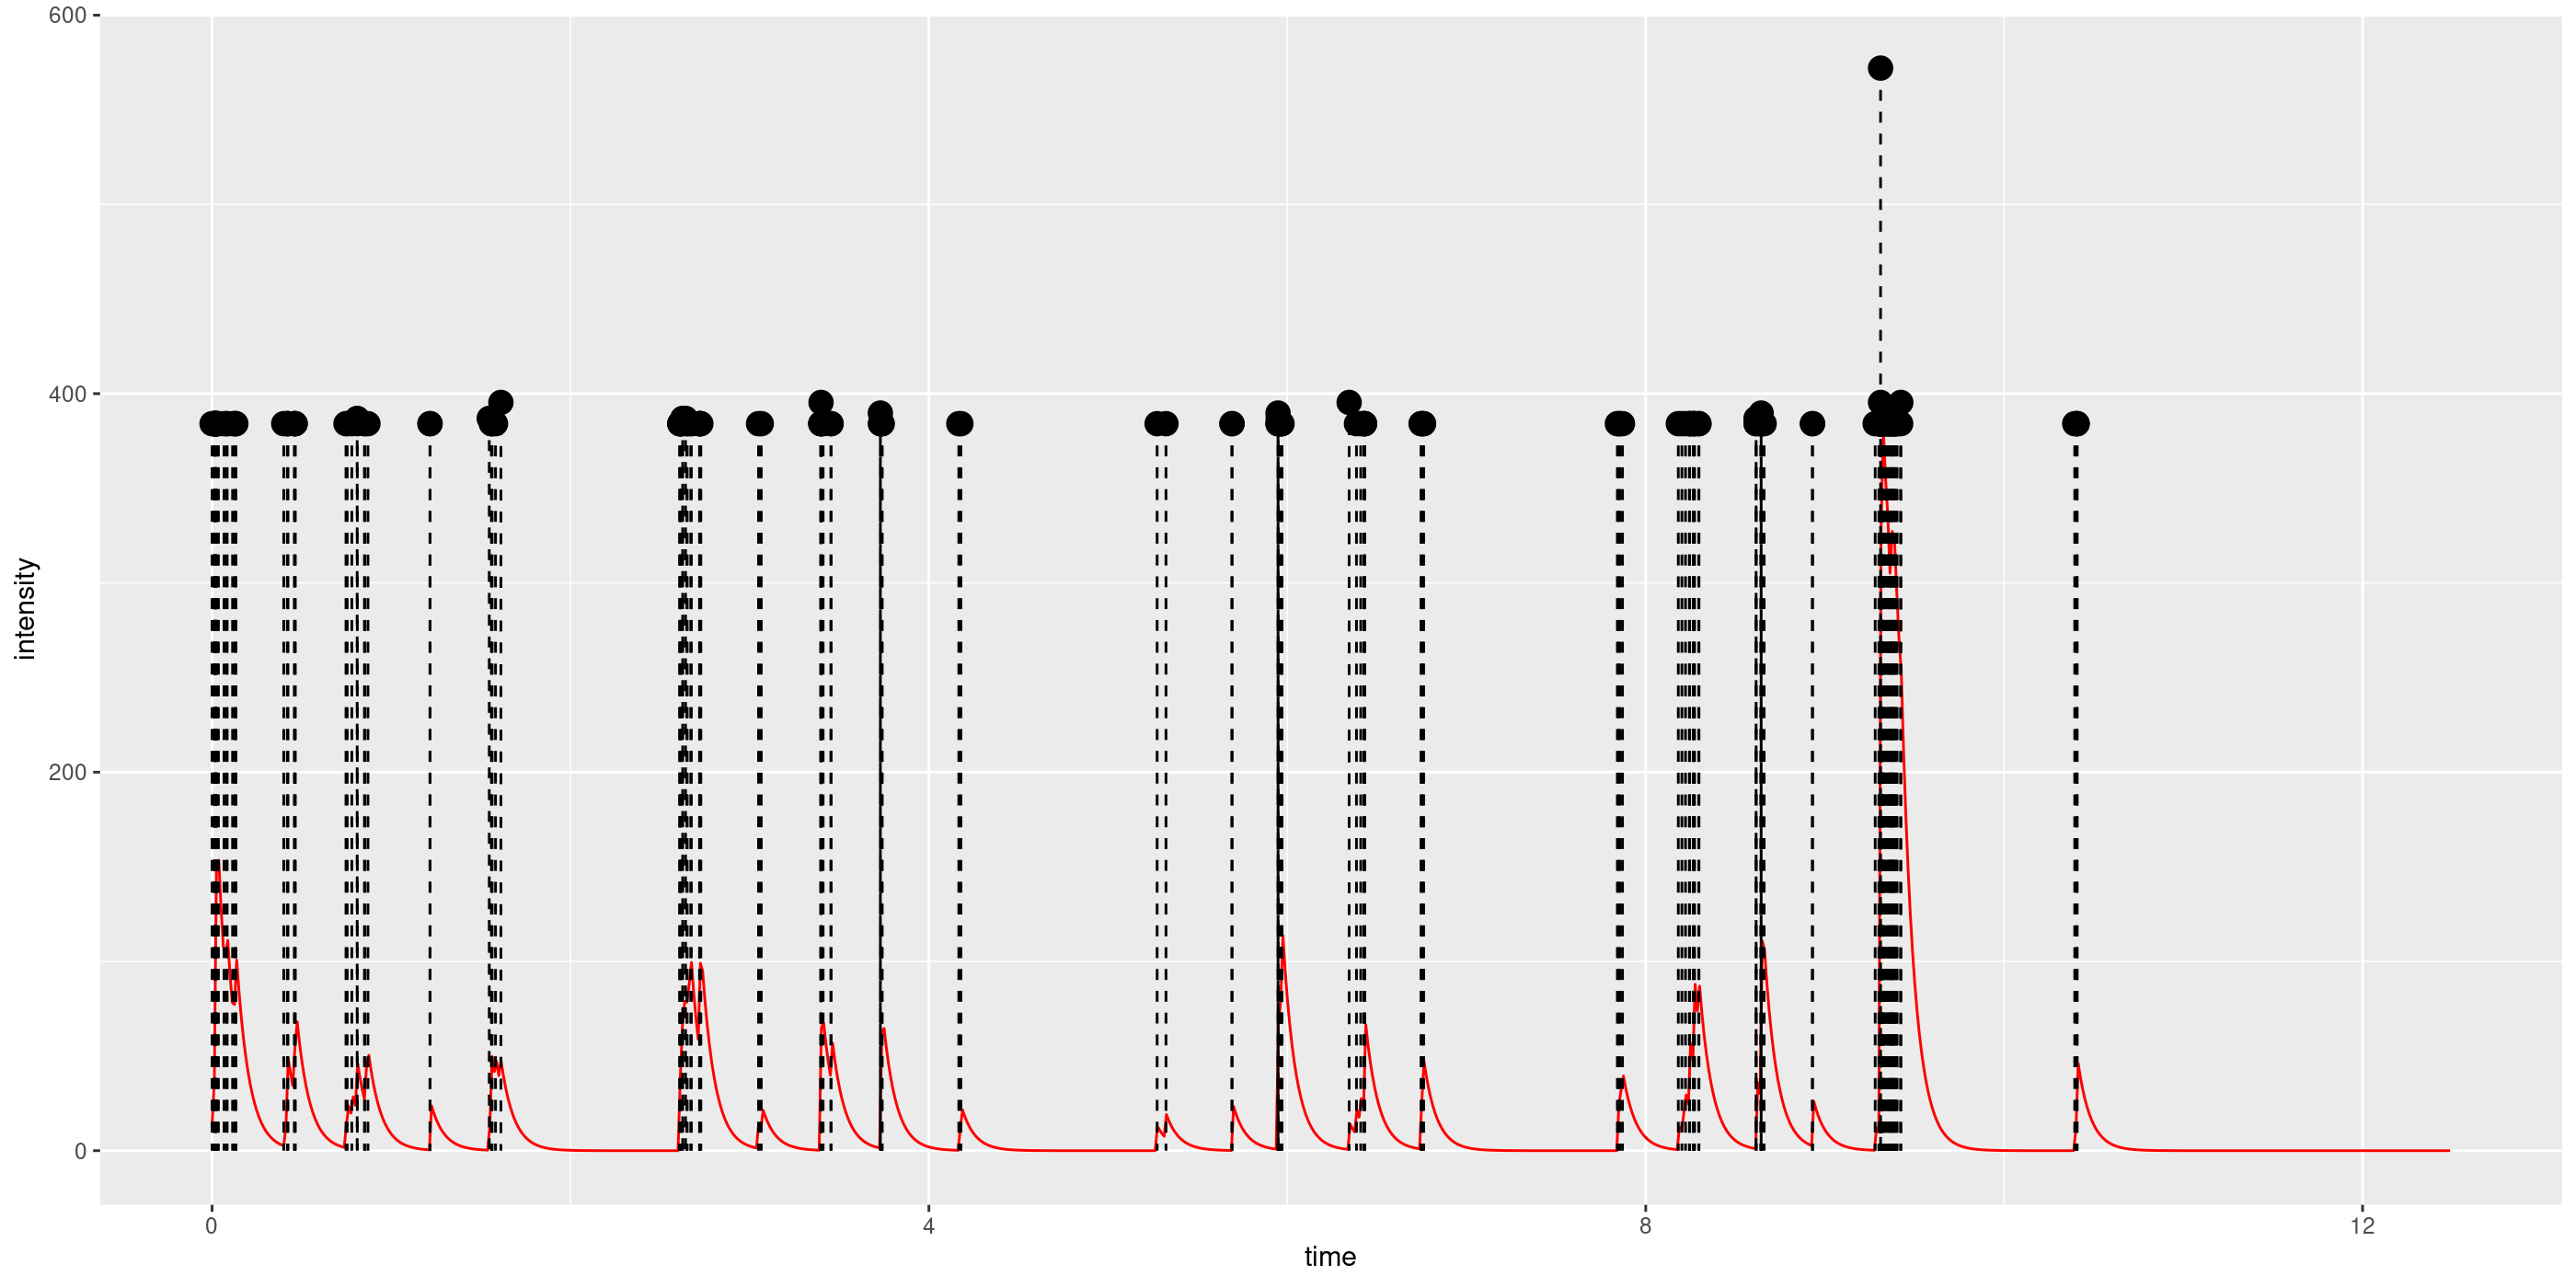

In [8]:
plot_event_series(fitted_model_29)

In [9]:
get_branching_factor(fitted_model_29)

[1] 0.9999998

In [10]:
predict_final_popularity(fitted_model_29)

[1] 20080427

- Różnica wartości parametru theta jest związana z niższą intensywnością wydarzeń dla zespołu 29. Widać to dobrze po zagęszczeniu wydarzeń - oba modele prezentują 200 wydarzeń, jednak oś czas w drugim przypadku jest prawie 6x dłuższa. 

- Wysokie wartości końcowego rozmiaru wynikają prawdopodobnie z pewnej regularności danych - brak zdarzeń w weekendy, podobne nasilenie w tygodniu, co sugeruje ich pewną powtarzalność i znikomą ograniczoność. Co więcej, testując dane innych zespołów trafiałem również nierzadko na branching_factor > 1. 